## 4. Feature engineering

- create a few datasets with dummies and categogian approach
- generate new features
- save processed dataframes to folder ML, ...

In [1]:
import numpy as np
import pandas as pd
import glob
import re
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

import warnings
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline 


In [2]:
def to_dummies(df, col_list):
    for col in col_list:
        df = pd.get_dummies(df, prefix=col+'_', columns=[col])
    return df


def to_categories(df, col_list):
    for col in col_list:
        df[col] = df[col].astype('category').cat.codes
    return df


def to_binary(df, col_list):
    label_encoder = LabelEncoder()
    for col in col_list:
        df[col] = label_encoder.fit_transform(df[col])
    return df


def to_log(df, col_list):
    ft=FunctionTransformer(func=np.log1p)
    for col in col_list:
        df[col] = ft.fit_transform(df[col])
    return df


## READ DATA

In [3]:
#local:
#path = "/"

# remote:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/module_6/"


Mounted at /content/drive


In [4]:
data = pd.read_csv(path + "PROCESSED/data.csv")
num_columns = list(pd.read_csv(path + "PROCESSED/num_columns.csv", header=None)[0])
cat_columns = list(pd.read_csv(path + "PROCESSED/cat_columns.csv", header=None)[0])
bin_columns = list(pd.read_csv(path + "PROCESSED/bin_columns.csv", header=None)[0])
drop_columns = list(pd.read_csv(path + "PROCESSED/drop_columns.csv", header=None)[0])
log_columns = list(pd.read_csv(path + "PROCESSED/log_columns.csv", header=None)[0])

data.head().T

,0,1,2,3,4
brand,SKODA,SKODA,SKODA,SKODA,SKODA
model_name,Skoda Fabia II,Skoda Fabia I,Skoda Octavia III (A7) Рестайлинг,other,Skoda Fabia II Рестайлинг
body_type,station wagon 5 doors.,station wagon 5 doors.,liftback,hatchback 5 doors.,hatchback 5 doors.
doors,5,5,5,5,5
model_date,2007,1999,2017,2010,2010
prod_date,2009,2001,2017,2012,2011
color,black,silver,white,blue,black
engine_V,1.4,1.4,1.6,1.4,1.2
power,86,68,110,180,70
fuel,petrol,petrol,petrol,petrol,petrol


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69951 entries, 0 to 69950
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         69951 non-null  object 
 1   model_name    69951 non-null  object 
 2   body_type     69951 non-null  object 
 3   doors         69951 non-null  int64  
 4   model_date    69951 non-null  int64  
 5   prod_date     69951 non-null  int64  
 6   color         69951 non-null  object 
 7   engine_V      69824 non-null  float64
 8   power         69951 non-null  int64  
 9   fuel          69951 non-null  object 
 10  mileage       69951 non-null  int64  
 11  transmission  69951 non-null  object 
 12  owners        69951 non-null  int64  
 13  pass          69950 non-null  object 
 14  drive         69951 non-null  object 
 15  wheel         69951 non-null  object 
 16  price         69951 non-null  int64  
 17  test_train    69951 non-null  object 
 18  dataset_year  69951 non-nu

In [6]:
# check empty values:
data.isnull().sum()


brand             0
model_name        0
body_type         0
doors             0
model_date        0
prod_date         0
color             0
engine_V        127
power             0
fuel              0
mileage           0
transmission      0
owners            0
pass              1
drive             0
wheel             0
price             0
test_train        0
dataset_year      0
model_age         0
new_model         0
car_age           0
new_car           0
retro             0
raritet           0
electrocar        0
petrol_car        0
1_owner           0
dtype: int64

In [7]:
data.engine_V.fillna(round(data.engine_V.mean(), 1), inplace=True)


In [8]:
data["pass"].value_counts()


Original     60310
Duplicate     9640
Name: pass, dtype: int64

In [9]:
data["pass"].fillna("Original", inplace=True)


In [10]:
data.isnull().sum()


brand           0
model_name      0
body_type       0
doors           0
model_date      0
prod_date       0
color           0
engine_V        0
power           0
fuel            0
mileage         0
transmission    0
owners          0
pass            0
drive           0
wheel           0
price           0
test_train      0
dataset_year    0
model_age       0
new_model       0
car_age         0
new_car         0
retro           0
raritet         0
electrocar      0
petrol_car      0
1_owner         0
dtype: int64

## drop_columns:

In [11]:
drop_columns


['model_date', 'prod_date', 'dataset_year']

In [12]:
data.drop(drop_columns, axis=1, inplace=True)


## binary features:

In [ ]:
bin_columns.remove("dataset_year")

In [14]:
data[bin_columns].sample(7)


,new_car,new_model,pass,retro,1_owner,wheel,electrocar,raritet,petrol_car
65409,no,no,Original,no,no,Left,no,no,yes
12469,no,no,Original,no,no,Left,no,no,yes
63860,no,no,Duplicate,no,no,Left,no,no,yes
47692,no,no,Original,no,no,Left,no,no,yes
41890,no,no,Original,no,no,Left,no,no,yes
33186,no,no,Original,no,yes,Left,no,no,yes
45553,no,no,Original,no,no,Left,no,no,no


In [15]:
data[bin_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69951 entries, 0 to 69950
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   new_car     69951 non-null  object
 1   new_model   69951 non-null  object
 2   pass        69951 non-null  object
 3   retro       69951 non-null  object
 4   1_owner     69951 non-null  object
 5   wheel       69951 non-null  object
 6   electrocar  69951 non-null  object
 7   raritet     69951 non-null  object
 8   petrol_car  69951 non-null  object
dtypes: object(9)
memory usage: 4.8+ MB


In [16]:
# process:
data = to_binary(data, bin_columns)
data[bin_columns].sample(7)


,new_car,new_model,pass,retro,1_owner,wheel,electrocar,raritet,petrol_car
13745,0,0,1,0,1,0,0,0,1
35694,0,0,1,0,1,0,0,0,1
10911,0,0,0,0,0,0,0,0,1
32939,0,0,1,0,0,0,0,0,1
47754,0,0,0,0,0,0,0,0,0
32384,0,0,1,0,0,0,0,0,1
14548,0,0,1,0,1,0,0,0,1


## numeric features:

In [17]:
num_columns, log_columns


(['car_age',
  'power',
  'engine_V',
  'model_date',
  'model_age',
  'mileage',
  'prod_date'],
 ['engine_V', 'power', 'mileage', 'model_age', 'car_age'])

In [18]:
# are they the same?
num_columns = list(set(num_columns) - set(drop_columns))
num_columns


['engine_V', 'mileage', 'car_age', 'model_age', 'power']

yes, we need to logarithm all numeric features Price was already processed

### logarythm:

In [19]:
data = to_log(data, log_columns)


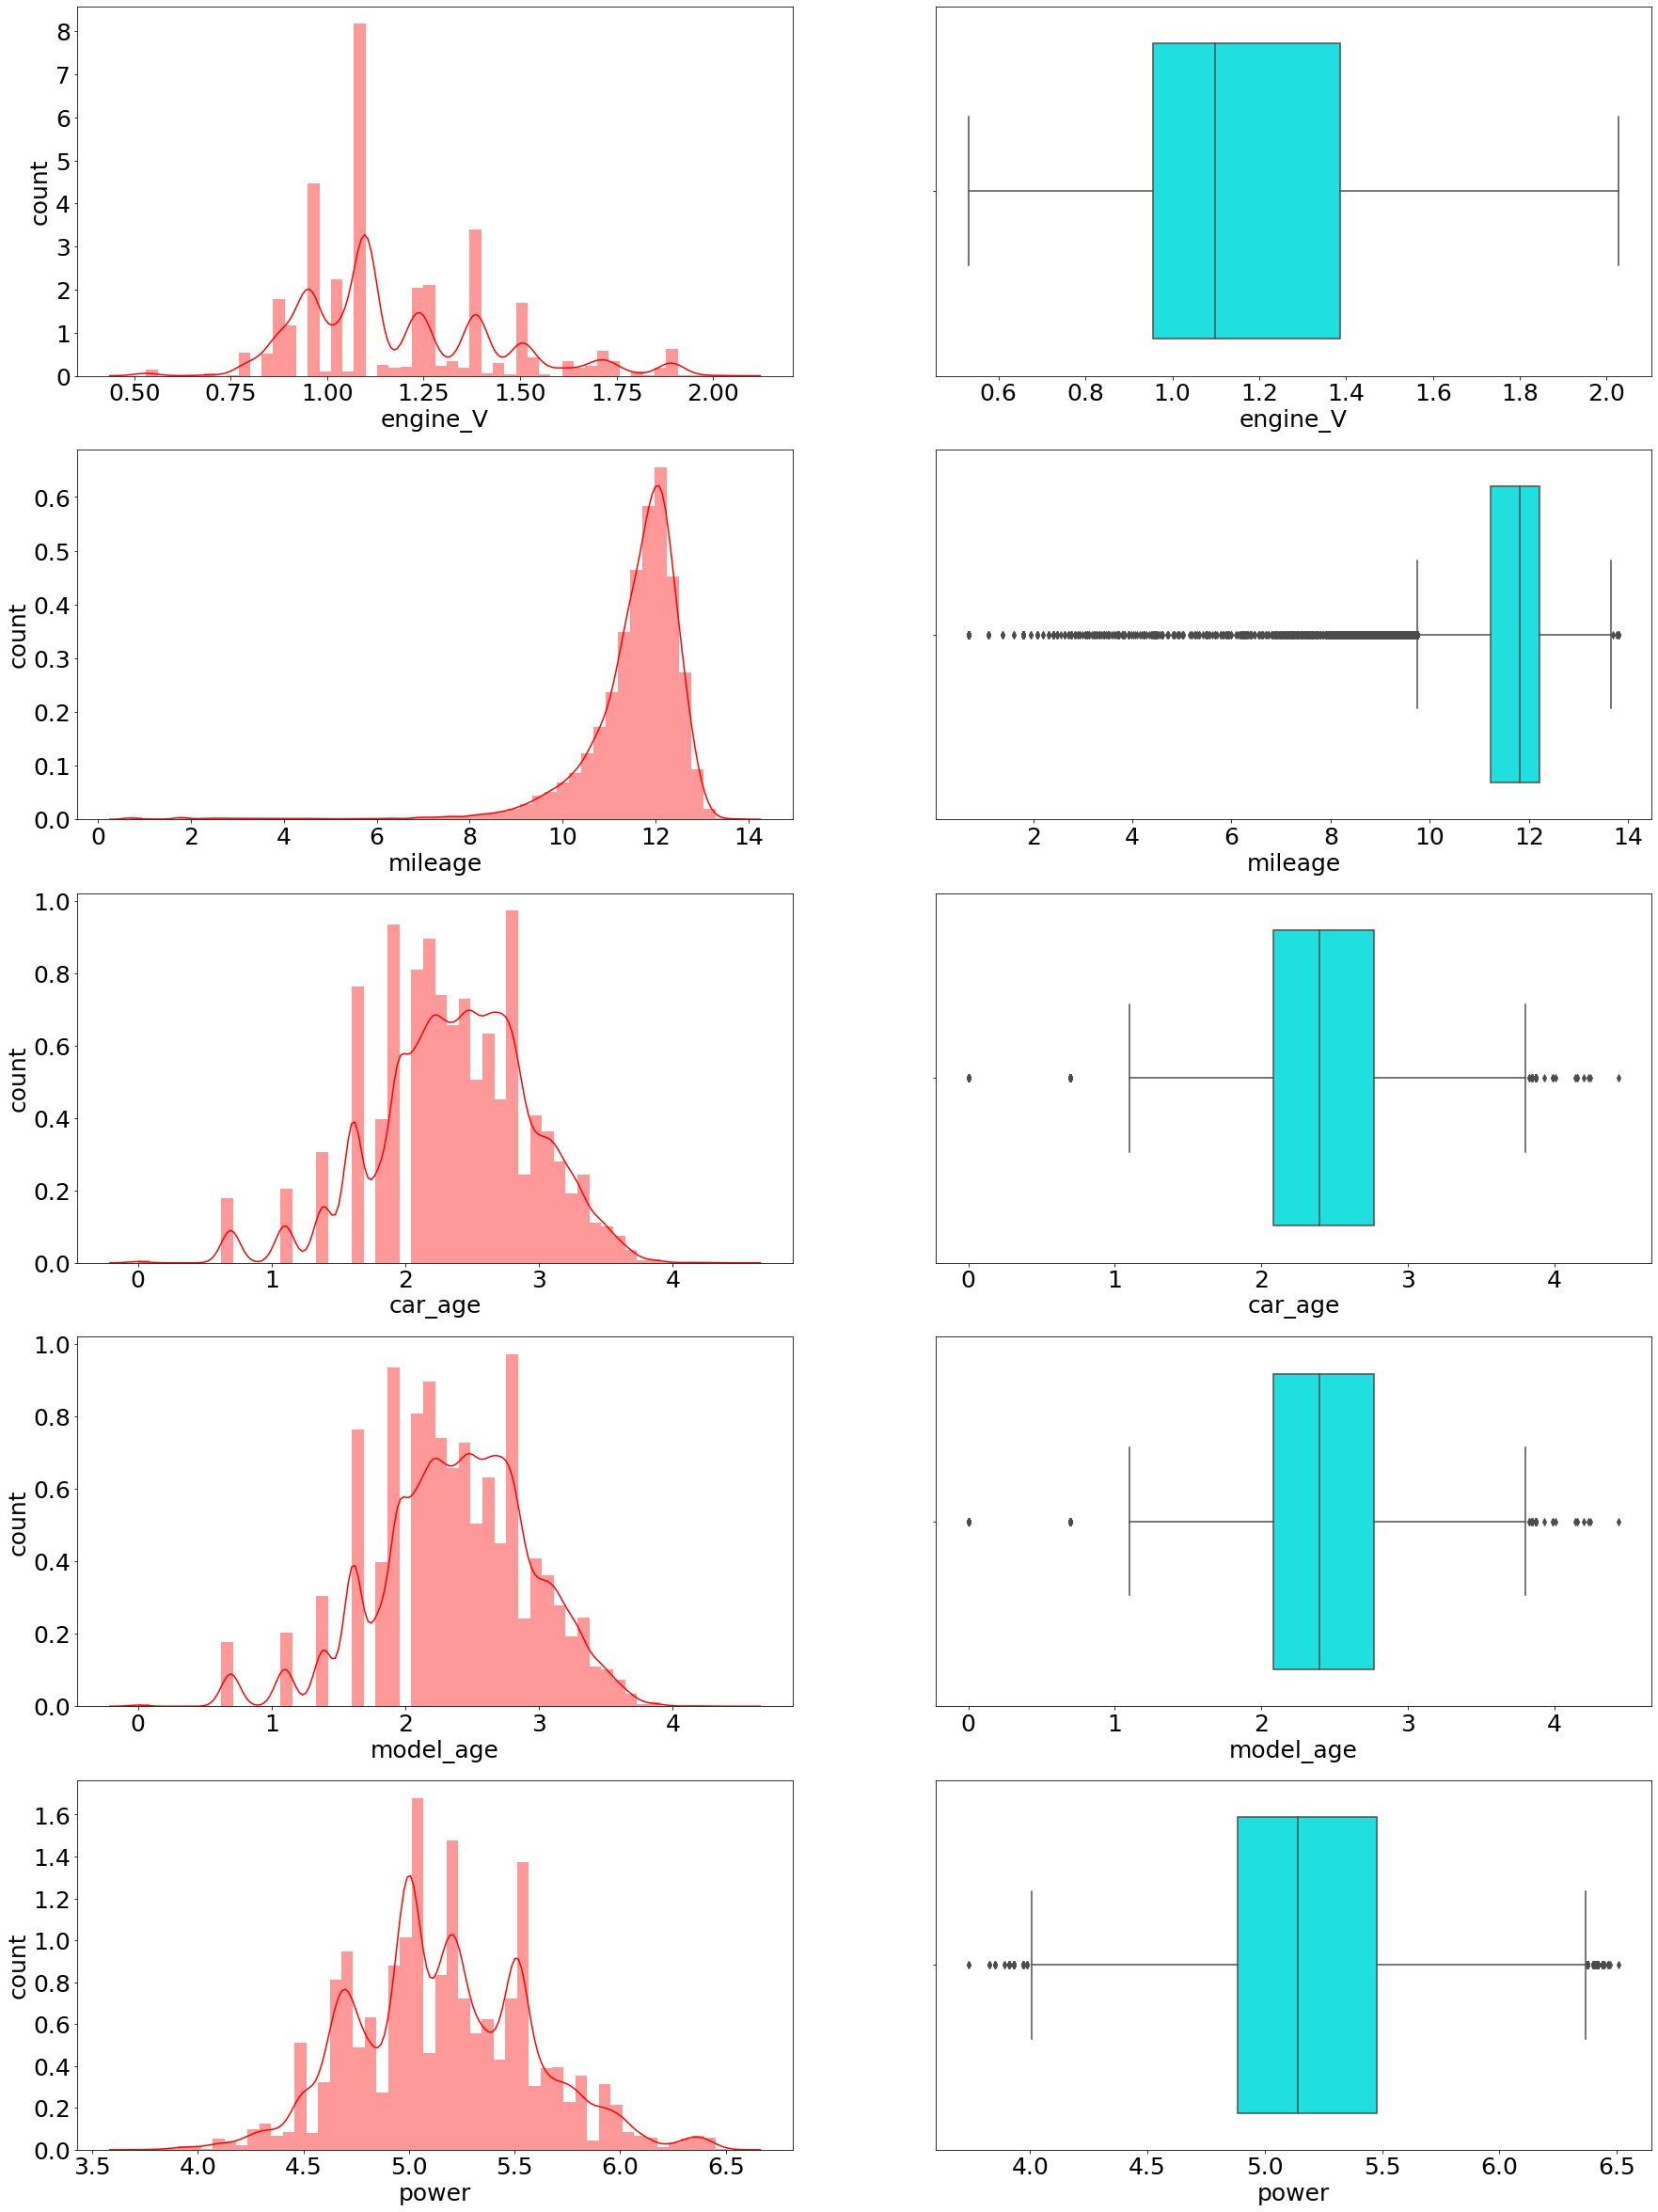

In [20]:
# check if logarythm helped:
i=1
plt.figure(figsize=(30,120))
for col in num_columns:
    plt.subplot(14,2,i)
    sns.distplot(data[data.test_train=="train"][col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(14,2,i)
    sns.boxplot(data[data.test_train=="train"][col],color="cyan")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1

plt.show()


yes, a little bit

### outliers:

exclude outliers from data or not? For now, I don't know I will create 2nd dataset, without outliers and process it in parallel

In [23]:
train_data = data[data.test_train=="train"]
test_data = data[data.test_train=="test"]


In [24]:
# remove outliers and save changed data to data_noouts:
# will be saved as a separate dataset
Q1 = train_data[num_columns].quantile(0.02)
Q3 = train_data[num_columns].quantile(0.98)
IQR = Q3 - Q1
keep_idx = ~((train_data[num_columns] < (Q1 - 1.5 * IQR)) |\
             (train_data[num_columns] > (Q3 + 1.5 * IQR))\
             ).any(axis=1)
remove_idx = ~(keep_idx)
# 2nd dataset without outliers:
train_data_noouts = train_data.loc[keep_idx]
# outliers
train_data_outliers = train_data.loc[remove_idx]

data_noouts = test_data.append(
    train_data_noouts, sort=False).reset_index(drop=True) 


In [25]:
print(str(len(train_data_outliers)) + " records have been removed")
data.shape, data_noouts.shape, train_data_outliers.shape


89 records have been removed


((69951, 25), (69862, 25), (89, 25))

## categorical features:

In [28]:
cat_columns


['body_type',
 'fuel',
 'model_name',
 'brand',
 'drive',
 'doors',
 'color',
 'owners',
 'transmission']

In [29]:
data[cat_columns].sample(7)


,body_type,fuel,model_name,brand,drive,doors,color,owners,transmission
41895,sedan,petrol,S60,VOLVO,FWD,4,white,3,AMT
35099,SUV 5 doors.,petrol,Mitsubishi Outlander I,MITSUBISHI,4WD,5,grey,3,MT
32658,SUV 5 doors.,diesel,Mitsubishi Pajero II,MITSUBISHI,4WD,5,red,2,MT
28805,sedan,petrol,other,LEXUS,4WD,4,black,3,AT
26948,SUV 5 doors.,petrol,Lexus NX 200 I Рестайлинг,LEXUS,FWD,5,white,1,CVT
4313,sedan,petrol,Audi A4 II (B6),AUDI,4WD,4,blue,2,AT
42506,sedan,petrol,S80,VOLVO,4WD,4,black,3,AT


In [30]:
# categorical features, that will stay in both datasets:
cat_columns_common = ["model_name", "body_type"]

data = to_categories(data, cat_columns_common)
data_noouts = to_categories(data_noouts, cat_columns_common)


In [31]:
cat_columns = list(set(cat_columns) - set(cat_columns_common))
cat_columns


['brand', 'doors', 'owners', 'color', 'fuel', 'drive', 'transmission']

In [32]:
data[cat_columns_common].sample(7)

,model_name,body_type
29953,413,0
68947,2,19
7787,458,8
26756,188,19
33855,245,0
10954,435,0
295,346,9


In [33]:
data_noouts[cat_columns_common].sample(7)


,model_name,body_type
5409,17,19
36198,351,9
67775,254,0
39645,37,19
58865,370,19
39929,33,19
17825,99,19


##  >>> dummies:

process all the rest as dummies to a separate dataset:

In [34]:
dum_columns = cat_columns


In [35]:
data_dum = to_dummies(data, dum_columns)


In [36]:
data_dum.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69951 entries, 0 to 69950
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model_name         69951 non-null  int16  
 1   body_type          69951 non-null  int8   
 2   engine_V           69951 non-null  float64
 3   power              69951 non-null  float64
 4   mileage            69951 non-null  float64
 5   pass               69951 non-null  int64  
 6   wheel              69951 non-null  int64  
 7   price              69951 non-null  int64  
 8   test_train         69951 non-null  object 
 9   model_age          69951 non-null  float64
 10  new_model          69951 non-null  int64  
 11  car_age            69951 non-null  float64
 12  new_car            69951 non-null  int64  
 13  retro              69951 non-null  int64  
 14  raritet            69951 non-null  int64  
 15  electrocar         69951 non-null  int64  
 16  petrol_car         699

In [37]:
data_noouts_dum = to_dummies(data_noouts, dum_columns)
data_noouts_dum.sample()


,model_name,body_type,engine_V,power,mileage,pass,wheel,price,test_train,model_age,new_model,car_age,new_car,retro,raritet,electrocar,petrol_car,1_owner,brand__AUDI,brand__BMW,brand__HONDA,brand__INFINITI,brand__LEXUS,brand__MERCEDES,brand__MITSUBISHI,brand__NISSAN,brand__SKODA,brand__TOYOTA,brand__VOLKSWAGEN,brand__VOLVO,doors__0,doors__2,doors__3,doors__4,doors__5,owners__1,owners__2,owners__3,color__beige,color__black,color__blue,color__braun,color__gold,color__green,color__grey,color__light-blue,color__orange,color__purple,color__red,color__rose,color__silver,color__violet,color__white,color__yellow,fuel__diesel,fuel__electro,fuel__gas,fuel__hybrid,fuel__petrol,drive__4WD,drive__FWD,drive__RWD,transmission__AMT,transmission__AT,transmission__CVT,transmission__MT
60867,377,0,1.504077,5.613128,12.33271,1,0,1600000,train,2.484907,0,2.484907,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0


In [38]:
data_noouts_dum.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69862 entries, 0 to 69861
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model_name         69862 non-null  int16  
 1   body_type          69862 non-null  int8   
 2   engine_V           69862 non-null  float64
 3   power              69862 non-null  float64
 4   mileage            69862 non-null  float64
 5   pass               69862 non-null  int64  
 6   wheel              69862 non-null  int64  
 7   price              69862 non-null  int64  
 8   test_train         69862 non-null  object 
 9   model_age          69862 non-null  float64
 10  new_model          69862 non-null  int64  
 11  car_age            69862 non-null  float64
 12  new_car            69862 non-null  int64  
 13  retro              69862 non-null  int64  
 14  raritet            69862 non-null  int64  
 15  electrocar         69862 non-null  int64  
 16  petrol_car         698

#### data_dummies datasets (with and without outliers) are ready for ML. 

## SAVE DATASETS:

In [39]:
data_dum.to_csv(path + "ML/data_dum.csv", index=False)
data_noouts_dum.to_csv(path + "ML/data_noouts_dum.csv", index=False)


Back to datasets without dummies: data and data_noouts

In [40]:
data[cat_columns].sample(7)


,brand,doors,owners,color,fuel,drive,transmission
19254,INFINITI,5,1,black,petrol,4WD,CVT
1711,SKODA,5,2,blue,petrol,FWD,AMT
42218,VOLVO,4,2,white,petrol,FWD,MT
5160,AUDI,4,3,grey,diesel,FWD,CVT
26115,TOYOTA,4,1,white,petrol,FWD,CVT
29607,VOLKSWAGEN,5,3,light-blue,diesel,FWD,MT
56223,TOYOTA,5,3,silver,petrol,FWD,AT


In [41]:
data_noouts[cat_columns].sample(7)


,brand,doors,owners,color,fuel,drive,transmission
69669,MITSUBISHI,3,3,purple,petrol,FWD,MT
59176,TOYOTA,5,3,grey,petrol,4WD,AT
31356,VOLVO,5,3,green,petrol,4WD,AT
29110,MITSUBISHI,4,3,silver,petrol,FWD,AT
29716,BMW,4,2,white,diesel,RWD,AT
47574,BMW,5,2,white,diesel,4WD,AT
2369,SKODA,5,2,white,petrol,FWD,AT


looks good, process both datasets: turn the rest categorical features to numbers


In [42]:
# process:
data = to_categories(data, cat_columns)
data_noouts = to_categories(data_noouts, cat_columns)


In [ ]:
data[cat_columns].sample(7)


,doors,transmission,drive,color,brand,fuel,owners
56478,3,1,1,14,9,4,0
29180,4,1,0,14,6,4,2
38729,2,3,1,1,0,4,2
66553,3,1,0,8,11,4,2
13305,4,1,0,1,5,4,0
22104,1,0,0,14,0,4,2
17802,3,1,1,14,10,4,0


In [43]:
data_noouts[cat_columns].sample(7)


,brand,doors,owners,color,fuel,drive,transmission
45461,11,3,2,1,4,1,1
55310,5,4,1,1,4,1,2
48405,1,3,2,14,4,2,3
50665,7,4,1,3,4,0,2
59216,9,4,2,1,4,0,1
4359,0,3,1,3,4,1,3
62938,4,3,2,12,4,2,1


In [44]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69951 entries, 0 to 69950
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         69951 non-null  int8   
 1   model_name    69951 non-null  int16  
 2   body_type     69951 non-null  int8   
 3   doors         69951 non-null  int8   
 4   color         69951 non-null  int8   
 5   engine_V      69951 non-null  float64
 6   power         69951 non-null  float64
 7   fuel          69951 non-null  int8   
 8   mileage       69951 non-null  float64
 9   transmission  69951 non-null  int8   
 10  owners        69951 non-null  int8   
 11  pass          69951 non-null  int64  
 12  drive         69951 non-null  int8   
 13  wheel         69951 non-null  int64  
 14  price         69951 non-null  int64  
 15  test_train    69951 non-null  object 
 16  model_age     69951 non-null  float64
 17  new_model     69951 non-null  int64  
 18  car_age       69951 non-nu

In [45]:
data_noouts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69862 entries, 0 to 69861
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         69862 non-null  int8   
 1   model_name    69862 non-null  int16  
 2   body_type     69862 non-null  int8   
 3   doors         69862 non-null  int8   
 4   color         69862 non-null  int8   
 5   engine_V      69862 non-null  float64
 6   power         69862 non-null  float64
 7   fuel          69862 non-null  int8   
 8   mileage       69862 non-null  float64
 9   transmission  69862 non-null  int8   
 10  owners        69862 non-null  int8   
 11  pass          69862 non-null  int64  
 12  drive         69862 non-null  int8   
 13  wheel         69862 non-null  int64  
 14  price         69862 non-null  int64  
 15  test_train    69862 non-null  object 
 16  model_age     69862 non-null  float64
 17  new_model     69862 non-null  int64  
 18  car_age       69862 non-nu

## SAVE DATASETS:

In [46]:
data.to_csv(path + "ML/data_ML.csv", index=False)
data_noouts.to_csv(path + "ML/data_noouts.csv", index=False)

next >>> 5. ML